# Graphical exploratory data analysis
Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python.

In [ ]:
import pandas as pd
# Import plotting modules
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import numpy as np

# Load iris file
iris = pd.read_csv('_datasets/iris.csv')

# 1. Plotting a histogram
## 1.1 Plotting a histogram of iris data:
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, _Iris setosa_, _Iris versicolor_, and _Iris virginica_. The full data set is [available as part of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use `sns.set()`, where `sns` is the alias that `seaborn` is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

In the video, Justin plotted the histograms by using the `pandas` library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for `plt.show()`) to the dummy variable `_`. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a `;` after your plotting statements to achieve the same effect. Justin prefers using `_`. Therefore, you will see it used in the solution code.

### Instructions:
* Import `matplotlib.pyplot` and `seaborn` as their usual aliases (`plt` and `sns`).
* Use `seaborn` to set the plotting defaults.
* Plot a histogram of the Iris versicolor petal lengths using `plt.hist()` and the provided NumPy array `versicolor_petal_length`.
* Show the histogram using `plt.show()`.

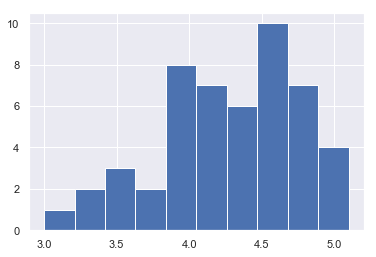

In [2]:
# Set default Seaborn style
sns.set()

# Filter versicolor from species column
versicolor = iris.loc[iris['species']=='versicolor']
# Select petal length column
versicolor_petal_length = versicolor.iloc[:,2]

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

## 1.2 Axis labels!
In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using `plt.xlabel()` and `plt.ylabel()`. Don't forget to add units and assign both statements to `_`. The packages `matplotlib.pyplot` and `seaborn` are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

### Instructions:
* Label the axes. Don't forget that you should always include units in your axis labels. Your $y$-axis label is just `'count'`. Your $x$-axis label is `'petal length (cm)'`. The units are essential!
* Display the plot constructed in the above steps using `plt.show()`.

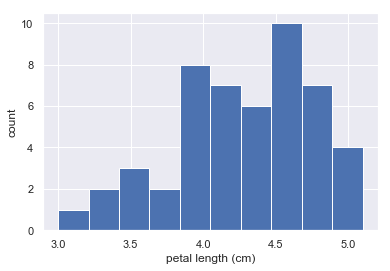

In [3]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## 1.3 Adjusting the number of bins in a histogram:
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the `bins` keyword argument of `plt.hist()`.

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, `versicolor_petal_length`, is already in your namespace.

### Instructions:
* Import `numpy as np`. This gives access to the square root function, `np.sqrt()`.
* Determine how many data points you have using `len()`.
* Compute the number of bins using the square root rule.
* Convert the number of bins to an integer using the built in `int()` function.
* Generate the histogram and make sure to use the `bins` keyword argument.
* Hit 'Submit Answer' to plot the figure and see the fruit of your labors!

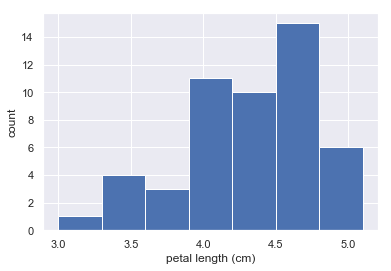

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

# 2. Plotting all of your data: Bee swarm plots
## 2.1 Bee swarm plot:
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as `df`.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:

```
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```

In the IPython Shell, you can use `sns.swarmplot`? or `help(sns.swarmplot)` for more details on how to make bee swarm plots using seaborn.

### Instructions:
* In the IPython Shell, inspect the DataFrame `df` using `df.head()`. This will let you identify which column names you need to pass as the `x` and `y` keyword arguments in your call to `sns.swarmplot()`.
* Use `sns.swarmplot()` to make a bee swarm plot from the DataFrame containing the Fisher iris data set, `df`. The x-axis should contain each of the three species, and the y-axis should contain the petal lengths.
* Label the axes.
* Show your plot.

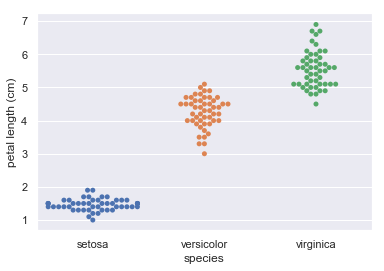

In [5]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## 2.2 Interpreting a bee swarm plot:
The following conclusions could you draw from the bee swarm plot of iris petal lengths:
* I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

# 3. Plotting all of your data: Empirical cumulative distribution functions
## 3.1 Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the `x` and `y` values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, `foo(x,y)` according to the following skeleton:
```
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```
The function `foo()` above takes two arguments `a` and `b` and returns two values `x` and `y`. The function header `def foo(a,b)`: contains the function signature `foo(a,b)`, which consists of the function name, along with its parameters.

### Instructions:
* Define a function with the signature `ecdf(data)`. Within the function definition,
    * Compute the number of data points, `n`, using the `len()` function.
    * The $x$-values are the sorted data. Use the `np.sort()` function to perform the sorting.
    * The $y$ data of the ECDF go from `1/n` to `1` in equally spaced increments. You can construct this using `np.arange()`. Remember, however, that the end value in `np.arange()` is not inclusive. Therefore, `np.arange()` will need to go from `1` to `n+1`. Be sure to divide this by `n`.
    * The function returns the values `x` and `y`.

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## 3.2 Plotting the ECDF:
You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's _Iris versicolor flowers_. You will then plot the ECDF. Recall that your `ecdf()` function returns two arrays so you will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

### Instructions:
* Use `ecdf()` to compute the ECDF of `versicolor_petal_length`. Unpack the output into `x_vers` and `y_vers`.
* Plot the ECDF as dots. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x_vers` and `y_vers` as arguments inside `plt.plot()`.
* Label the axes. You can label the y-axis `'ECDF'`.
* Show your plot.

In [7]:
# Print unique values in 'species' column
print('Unique values in "species" column:')
print(iris.species.unique())

# Filter all rows with versicolor in species column
versicolor = iris.loc[iris['species']=='versicolor']
# Select petal length column
versicolor_petal_length = versicolor.iloc[:,2]

# Filter all rows with setosa in species column
setosa = iris.loc[iris['species']=='setosa']
# Select petal length column
setosa_petal_length = setosa.iloc[:,2]

# Filter all rows with virginica in species column
virginica = iris.loc[iris['species']=='virginica']
# Select petal length column
virginica_petal_length = virginica.iloc[:,2]

Unique values in "species" column:
['setosa' 'versicolor' 'virginica']


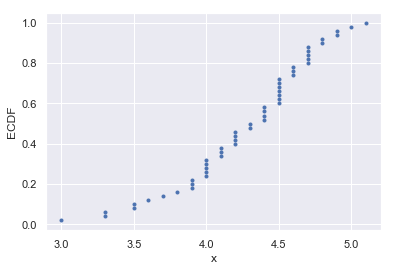

In [8]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('x')

# Display the plot
plt.show()

## 3.3 Comparison of ECDFs:
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use `plt.plot()` three times, once for each ECDF. Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.

### Instructions:
* Compute ECDFs for each of the three species using your `ecdf()` function. The variables `setosa_petal_length`, `versicolor_petal_length`, and `virginica_petal_length` are all in your namespace. Unpack the ECDFs into `x_set`, `y_set`, `x_vers`, `y_vers` and `x_virg`, `y_virg`, respectively.
* Plot all three ECDFs on the same plot as dots. To do this, you will need three `plt.plot()` commands. Assign the result of each to `_`.
* A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!

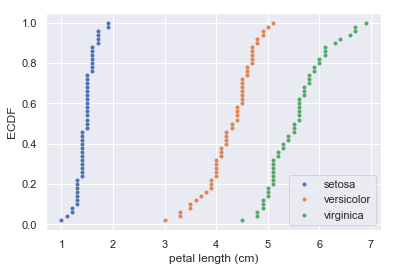

In [9]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.